# Problem 9.1

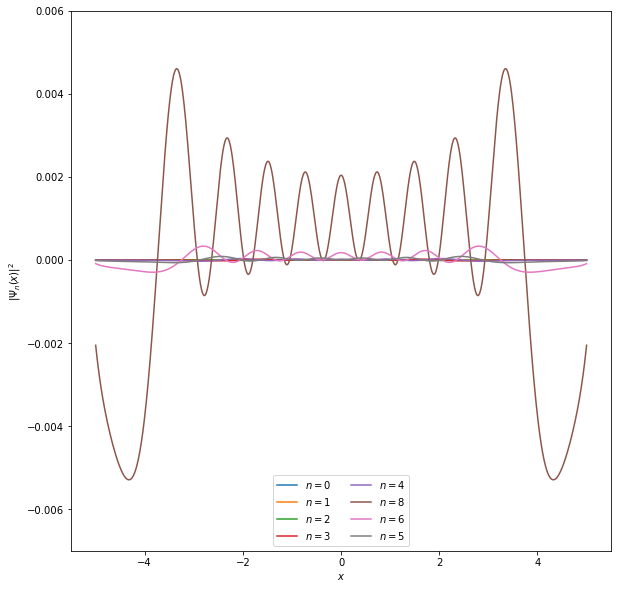

In [4]:
import matplotlib
from math import factorial
from numpy import *
from numpy.polynomial.hermite import *
from pylab import *
%matplotlib inline

#potential for k=1
def V(x):
    return 0.5*x**2

figure(figsize=(10, 10))

# graph grid settings
N=1000 # number of grid points
x0, x1=-5., 5. # grid boundaries
dx=(x1-x0)/(N-1) # grid spacing
x=linspace(x0, x1, N) # grid points

# setup of Hamiltonian
kin=zeros([N, N]) #init kinetic term

for k in range(0, N):
    if k>0:
        kin[k-1, k]=-0.5/dx**2
    kin[k, k]=1./dx**2
    if k+1<N:
        kin[k+1, k]=-0.5/dx**2


pot=diag(V(x)) #Extract and construct a diagonal array from the poential matrix

H = kin + pot #Hamiltonian

# compute eigenvectors
E, psi_E=eigh(H)
# compute eigenvalues
E=eigvalsh(H)

#clear the current figure
clf()


for n in [0, 1, 2, 3, 4, 8, 6, 5]:
    c=zeros(n+1)
    c[n]=1
    plot(x,(psi_E[:, n]/sqrt(dx))**2 -
    (hermval(x, c)*exp(-0.5*x**2)/sqrt(sqrt(pi)*2**n*factorial(n)))**2,label='$n=%i$' % n)

legend(ncol=2)
xlabel(r'$x$')
#ylabel(r'$|\Psi_n(x)|^2-|\Psi_{n,\mathrm{exact}}(x)|^2$')
ylabel(r'$|\Psi_n(x)|^2$')
gca().set_ylim(-0.007, 0.006)
gca().set_position((0.2, 0.15, 0.75, 0.75))
show()

# Problem 9.7

[1.         2.99998748 4.99995007 6.99988971 8.99982487]


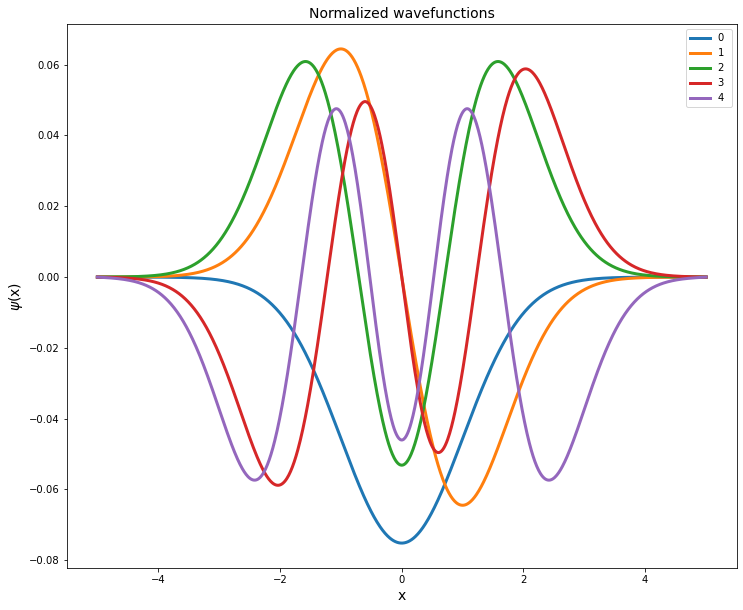

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return 0.5*x**2

a=float(-5)
b=float(5)
N=int(1000)
x=np.linspace(a,b,N)
h=x[1]-x[0]

T=np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
            if i==j:
                    T[i,j]=-2
            elif np.abs(i-j)==1:
                    T[i,j]=1
            else:
                    T[i,j]=0

V=np.zeros((N-2)**2).reshape(N-2,N-2)

for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0
            
H=-T/(2*h**2)+V
val,vec=np.linalg.eig(H)
z=np.argsort(val)
z=z[0:5]
energies=(val[z]/val[z][0])
print(energies)
plt.figure(figsize=(12,10))

for i in range(len(z)):
    y=[]
    y=np.append(y,vec[:,z[i]])
    y=np.append(y,0)
    y=np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('Normalized wavefunctions',size=14)
plt.show()


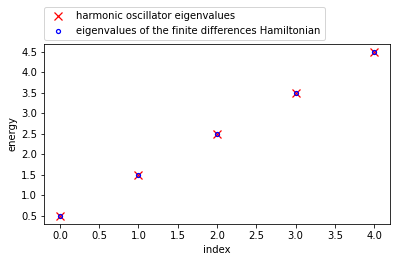

In [6]:
#figure(figsize=(10, 10))
n=5
plot(array(range(0,n)),array(range(0,n))+0.5, 'rx', mew=1.25, 
     ms=8,label='harmonic oscillator eigenvalues')

plot(array(range(0,n)),sort(val)[0:n], '.', mew=1.25, ms=8, mfc='none',
     mec='b',label='eigenvalues of the finite differences Hamiltonian')

xlabel('index')
ylabel('energy')
legend(bbox_to_anchor=(0.,1.02,1.,.102), loc=3,borderaxespad=0.)
gca().set_position((0.15,0.15,0.8,0.625))
show()

In [12]:
#the difference of eigen values from Theoretical values
E = val
EE = np.argsort(E)
EE = EE[0:10]
En = E[EE]

diff = []
for i in range(10):
    Et = i + 0.5
    lkj = En[i] - Et
    diff.append(lkj)
print('Differences of lower state Energy values from the calculated theoretical values:')
print('\033[0m')
print(diff)

Differences of lower state Energy values from the calculated theoretical values:

[-3.1312085057577654e-06, -1.5652808740274082e-05, -4.062300134455299e-05, -7.706146840780193e-05, -0.0001157474936572811, -9.231200128656525e-05, 0.00033597553891873133, 0.002572682748225752, 0.011010191696888327, 0.03598081124086505]


# Problem 9.4

[17.875999999998864, 106.24600000014325]


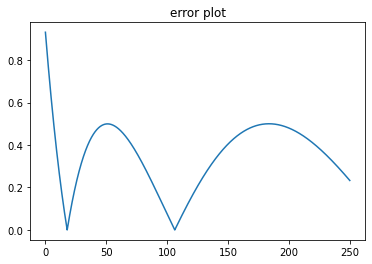

E0=17.875999999998864
E1=106.24600000014325


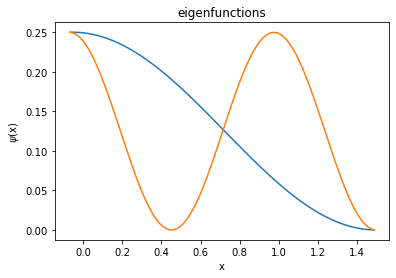

Text(0.5, 1.0, 'Energy vs Index')

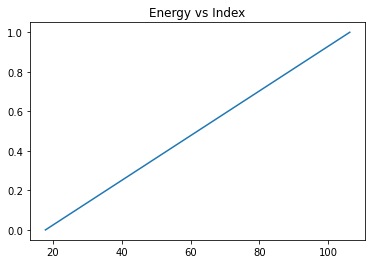

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#given

x_e = 1.6
C_0 = 6.4
D_e = 0.3
a = 1

#parameters for the matching method

dx = 0.01
dE = 0.001
E_0 = 0.0
k = 0.3
b=0.0
x_0 = -0.07
y_0 = 0.5
x_f = 1.5
dy_0 = 0.01


X=[]
Y=[]
N=[]
E=[]

#potential from the question
def V(x):
    return C_0 + (D_e)*(1-np.exp(x-x_e))**2

#fractional error
def fluct(X,Y):
    q=1
    while q<len(Y):
        if q!=0 and q!=len(Y)-1:
            if Y[q+1]>Y[q] and Y[q]<Y[q-1]:
                E.append(X[q])
        q=q+1

        
def sym(Y):
    a=0
    t=1
    while a<len(Y):
        if abs(abs(Y[a])-abs(Y[len(Y)-a-1]))<0.01:
            t=t*1
        else:
            t=t*0
        a=a+1
    return t

def nodes(Y):
    a=1
    p=0
    while a<len(Y):
        if a!=0 and a!=len(Y)-1:
            if Y[a+1]>Y[a] and Y[a]<Y[a-1]:
                p=p+1
        a=a+1
    return p

def normalise(Y):
    a=0
    w=0
    while q<len(Y):
        w=w+(Y[a]*dx)
        a=a+1
    while a<len(Y):
        Y[q]=Y[a]/w
        a=a+1

#To satisfy the boundary conditions we make this loop
while E_0 <= 250.0:
    x = x_0
    y = y_0
    dy = dy_0
    while x <= x_f:
        d2y=k*k*(V(x)-E_0)*y
        dy=dy+(d2y*dx)
        y=y+(dy*dx)
        x=x+dx
    X.append(E_0)
    Y.append(abs(b-y))
    E_0 = E_0 + dE
    
fluct(X,Y)
print(E)
plt.plot(X,Y)
plt.title('error plot')
plt.show()

for e in E:
    X.clear()
    Y.clear()
    x = x_0
    y = y_0
    dy = dy_0
    while x <= x_f:
        d2y=k*k*(V(x)-e)*y
        dy=dy+(d2y*dx)
        Y.append(y*y)
        y=y+(dy*dx)
        X.append(x)
        x=x+dx
    normalise(Y)
    plt.plot(X,Y)
    plt.title('eigenfunctions')
    plt.xlabel('x')
    plt.ylabel('$\psi$(x)')
    n=nodes(Y)
    N.append(n)
    print("E{0}={1}".format(n,e))

plt.show()
plt.plot(E,N)
plt.title('Energy vs Index')

# Problem 10.3

In [104]:
#(a):
import numpy as np
import matplotlib.pyplot as plt

def pot(x,y):
    v= 0.5*(x**2+y**2)
    return v

a=float(-5)
b=float(5)
N=int(51)
x=np.linspace(a,b,N)
y=np.linspace(a,b,N)
h=x[1]-x[0]
g=y[1]-y[0]

T=np.zeros((N-2)**2).reshape(N-2,N-2) #

#KE MATRIX
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]=-2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0
            
T= -T/(2*h**2)
 
#PE MATRIX
V=np.zeros((N-2)**2).reshape(N-2,N-2)

for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]=Vpot(x[i+1],y[i+1])
        else:
            V[i,j]=0

H= T+V
print("The Hamiltonian matrix is:")
print(H)

The Hamiltonian matrix is:
[[ 48.04 -12.5    0.   ...   0.     0.     0.  ]
 [-12.5   46.16 -12.5  ...   0.     0.     0.  ]
 [  0.   -12.5   44.36 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...  44.36 -12.5    0.  ]
 [  0.     0.     0.   ... -12.5   46.16 -12.5 ]
 [  0.     0.     0.   ...   0.   -12.5   48.04]]


In [105]:
#(b):
import numpy as np
import matplotlib.pyplot as plt

w,v=np.linalg.eig(H) #Compute the eigenvalues and right eigenvectors

z = np.argsort(w) #Returns the indices that would sort an array(to get the smallest 10 eigen values)
z = z[0:10]
eigenvalues=(w[z]/w[z][0]) #energies in terms of ground state energy
print("The eigenvalues are:")
print(eigenvalues)

#applying same concept to get the eigenvectors
c =np.argsort(v)
c =c[0:10]
eigenvectors=(v[c]/v[c][0])
print("The eigenvectors are:")
print(eigenvectors)

The eigenvalues are:
[ 1.          2.99282684  4.97122791  6.93504126  8.88409877 10.81822574
 12.73724078 14.64095676 16.52918758 18.40177653]
The eigenvectors are:
[[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
    1.00000000e+00  1.00000000e+00]
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
    1.00000000e+00  1.00000000e+00]
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
    1.00000000e+00  1.00000000e+00]
  ...
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
    1.00000000e+00  1.00000000e+00]
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
    1.00000000e+00  1.00000000e+00]
  [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
    1.00000000e+00  1.00000000e+00]]

 [[ 2.61323421e+02 -2.11842382e+02  1.70065871e+02 ... -8.80041792e-01
   -1.21208370e+00  1.20317543e+00]
  [ 8.34801299e+06 -3.88142524e+05 -1.41735815e+05 ... -3.91073415e-04
   -4.

The contour plot of the potential is:


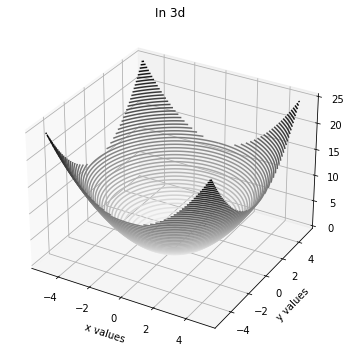

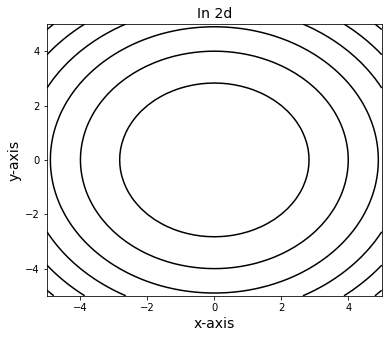

In [106]:
#b)ii
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
x=np.linspace(-5,5,51)
y=np.linspace(-5,5,51)
X,Y=np.meshgrid(x,y)
V=(1/2)*(X**2+Y**2)
print("The contour plot of the potential is:")

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, V, 50, cmap='binary')
ax.set_title('In 3d')
ax.set_xlabel('x values')
ax.set_ylabel('y values')

plt.figure(figsize=(6,5))
plt.xlabel('x-axis', size=14)
plt.ylabel('y-axis', size=14)
plt.title('In 2d', size=14)
plt.contour(X, Y, V, colors='black')

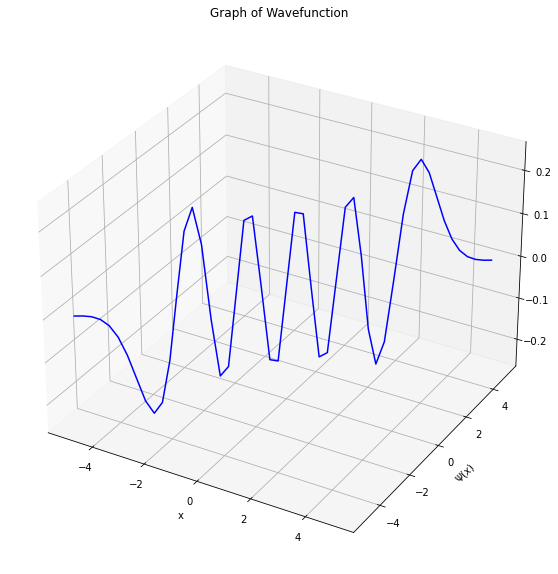

In [112]:
#c
plt.figure(figsize=(12,10))
for i in range(len(z)):
    j = []
    j = np.append(j,v[:,z[i]])
    j = np.append(j,0)
    j = np.insert(j,0,0)
    ax = plt.axes(projection='3d')
    ax.set_title('Graph of Wavefunction')
    ax.plot3D(x,y,j,'blue')
    ax.set_xlabel('x')
    ax.set_ylabel('$\Psi(x)$')

# Problem 11.2

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math as mat

x_o = 25
k_o = 2
sigma = 2
ep = 10**(-10)

d = math.pi/(k_o + (1/(mat.sqrt(2)*sigma))*(mat.sqrt(mat.log((sigma/ep)*mat.sqrt(2/mat.pi)))))


print('Nyquist condition : \u0394x <= ',d)

Nyquist condition : Δx <=  0.8459545719234167


# Problem 11.5

<function matplotlib.pyplot.show(close=None, block=None)>

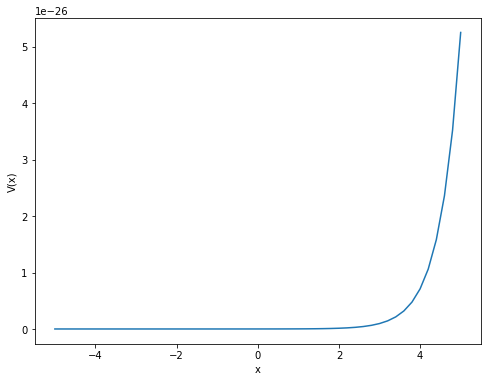

In [93]:
import numpy as np
import matplotlib.pyplot as plt


V_0 = 1.5
w = 1
x_0 = 35

#potential energy
V = V_0/((np.cosh((x-x_0)/w))**2)


#plot for the potential
figure(figsize=(8, 6))
plt.plot(x,V)
plt.ylabel('V(x)')
plt.xlabel('x')
plt.show